In [1]:
import sys
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
import cv2

PROJ_ROOT = os.pardir
image_dir = join(PROJ_ROOT, 'dataset', 'images')
mask_dir = join(PROJ_ROOT, 'dataset', 'masks')

In [2]:
img_count = len(os.listdir(image_dir))
mask_count = len(os.listdir(mask_dir))
print(img_count)

assert img_count == mask_count

4000


In [3]:
depth_df = pd.read_csv(join(PROJ_ROOT, 'dataset', 'train.csv'))

In [4]:
print(depth_df.shape)
depth_df.head()

(4000, 2)


,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


In [5]:
no_salt_count = depth_df['rle_mask'].isnull().sum()
print(f'percentage of no salt: {round(no_salt_count / depth_df.shape[0], 4)}')

percentage of no salt: 0.3905


In [6]:
np.random.seed(3)
rnd_idx = np.random.randint(0, 4000)
rnd_id = depth_df.iloc[rnd_idx, 0]

img_path = join(image_dir, rnd_id + '.png')
rnd_img = cv2.imread(img_path)
mask_path = join(mask_dir, rnd_id + '.png')
rnd_mask = cv2.imread(mask_path)

image shape: (101, 101, 3)
mask shape: (101, 101, 3)


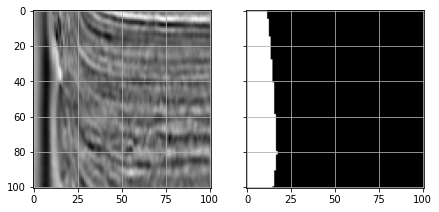

In [7]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(7, 5))
ax[0].imshow(rnd_img)
ax[1].imshow(rnd_mask)
ax[0].grid()
ax[1].grid()
print(f'image shape: {rnd_img.shape}')
print(f'mask shape: {rnd_mask.shape}')
plt.show()

In [8]:
file_list = list(depth_df['id'].values)

np.random.seed(24)
np.random.shuffle(file_list)

In [9]:
f_val = file_list[::10]
f_train = list(set(file_list) - set(f_val))